# TP 3 : Graphe Sémantique WordNet
## Réalisé par : Mohamed Rida Lajghal  IID3

### Import Biblio :

In [1]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt

from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag

In [9]:
# Tokenizers
nltk.download('punkt')
nltk.download('punkt_tab')

# POS tagger
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# WordNet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\redag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\redag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\redag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\redag\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\redag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\redag\AppData\Roaming\nltk_data...
[nltk_data]   Package 

True

## Fonctions utiles :

In [7]:
def get_nouns_verbs(sentence):
    tokens = word_tokenize(sentence)
    tagged = pos_tag(tokens)
    
    nouns = [w for w, p in tagged if p.startswith('NN')]
    verbs = [w for w, p in tagged if p.startswith('VB')]
    
    return nouns, verbs


def get_synset(word, pos=None):
    synsets = wn.synsets(word, pos=pos)
    return synsets[0] if synsets else None


def draw_graph(G, title="Semantic Graph"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    
    edge_colors = [G[u][v].get('color', 'black') for u, v in G.edges()]
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            edge_color=edge_colors, node_size=2500, font_size=9)
    
    plt.title(title)
    plt.show()


## Exercice 1 :
#### The cat chased the mouse in the garden.
1. Identifier tous les noms et verbes.
2. Trouver le synset correct pour chaque mot.
3. Construire un graphe sémantique :\
a. Nœuds = synsets (étiquetés avec le lemme principal)\
b. Arêtes = is-a (hyperonymes/hyponymes) et part-of (méronymes)
4. Dessiner le graphe visuellement (NetworkX/Graphviz).

In [10]:
### Identifier noms et verbes

sentence1 = "The cat chased the mouse in the garden."
nouns, verbs = get_nouns_verbs(sentence1)

print("Nouns:", nouns)
print("Verbs:", verbs)

Nouns: ['cat', 'mouse', 'garden']
Verbs: ['chased']


In [11]:
### Trouver les synsets

synsets1 = {}

for word in nouns:
    synsets1[word] = get_synset(word, wn.NOUN)

for word in verbs:
    synsets1[word] = get_synset(word, wn.VERB)

synsets1

{'cat': Synset('cat.n.01'),
 'mouse': Synset('mouse.n.01'),
 'garden': Synset('garden.n.01'),
 'chased': Synset('chase.v.01')}

In [12]:
### Construire le graphe sémantique

G1 = nx.DiGraph()

for word, syn in synsets1.items():
    if syn:
        G1.add_node(syn.name())
        
        # Hypernymes (is-a)
        for h in syn.hypernyms():
            G1.add_node(h.name())
            G1.add_edge(syn.name(), h.name(), color='red')
        
        # Méronymes (part-of)
        for m in syn.part_meronyms():
            G1.add_node(m.name())
            G1.add_edge(syn.name(), m.name(), color='green')


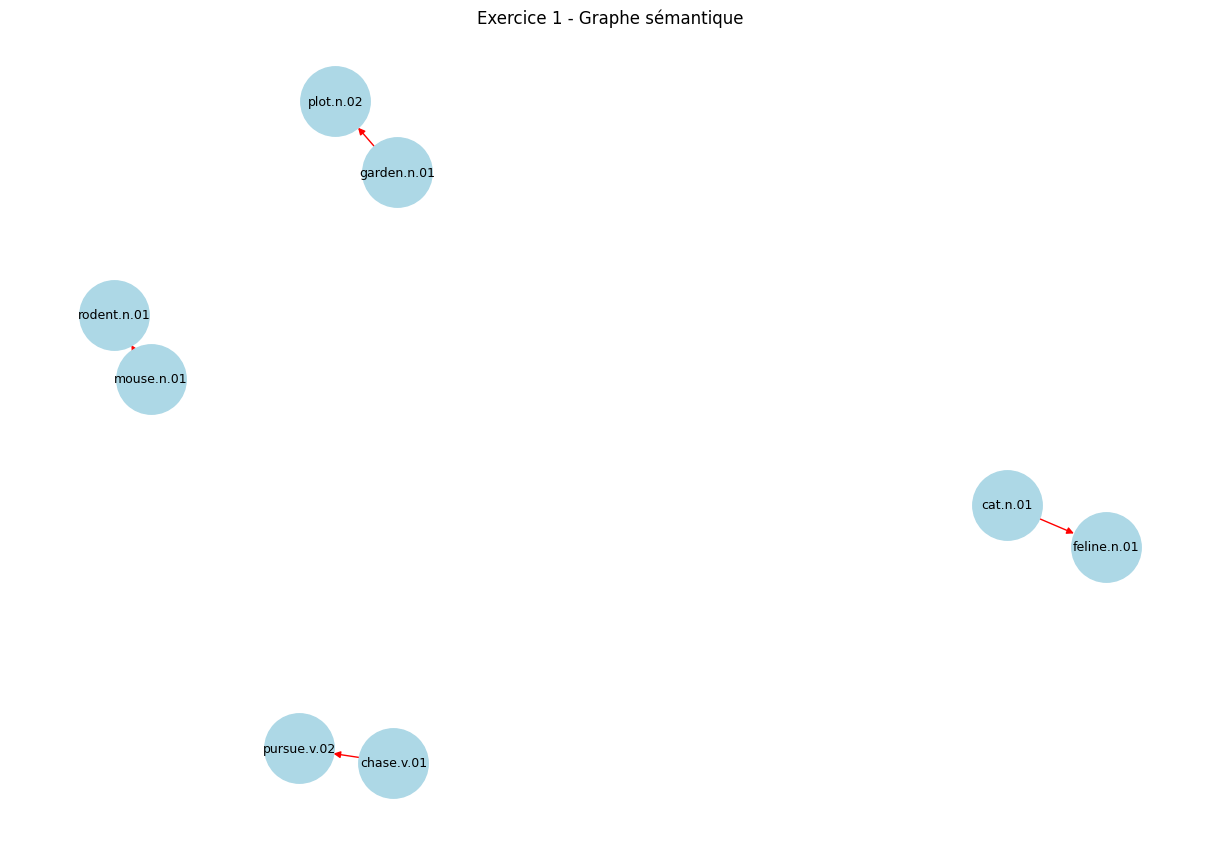

In [13]:
### Dessiner le graphe
draw_graph(G1, "Exercice 1 - Graphe sémantique")

## Exercice 2 :
### The chef prepared a meal and served it to the guests.
1. Identifier tous les noms et verbes.
2. Construire un graphe sémantique :\
a. Inclure les synonymes comme nœuds supplémentaires reliés aux nœuds
principaux.\
b. Inclure hyperonymes/hyponymes.
3. Dessiner des arêtes entre verbes et noms montrant les rôles sémantiques.

In [14]:
### Noms et verbes

sentence2 = "The chef prepared a meal and served it to the guests."
nouns2, verbs2 = get_nouns_verbs(sentence2)

print("Nouns:", nouns2)
print("Verbs:", verbs2)

Nouns: ['chef', 'meal', 'guests']
Verbs: ['prepared', 'served']


In [15]:
### Graphe avec synonymes + hyperonymes

G2 = nx.DiGraph()

for word in nouns2 + verbs2:
    syn = get_synset(word)
    if syn:
        G2.add_node(syn.name())
        
        # Synonymes
        for lemma in syn.lemmas():
            G2.add_node(lemma.name())
            G2.add_edge(syn.name(), lemma.name())
        
        # Hyperonymes
        for h in syn.hypernyms():
            G2.add_node(h.name())
            G2.add_edge(syn.name(), h.name(), color='red')

In [16]:
### Rôles sémantiques (verbe → nom)

for v in verbs2:
    v_syn = get_synset(v, wn.VERB)
    for n in nouns2:
        n_syn = get_synset(n, wn.NOUN)
        if v_syn and n_syn:
            G2.add_edge(v_syn.name(), n_syn.name(), color='blue')

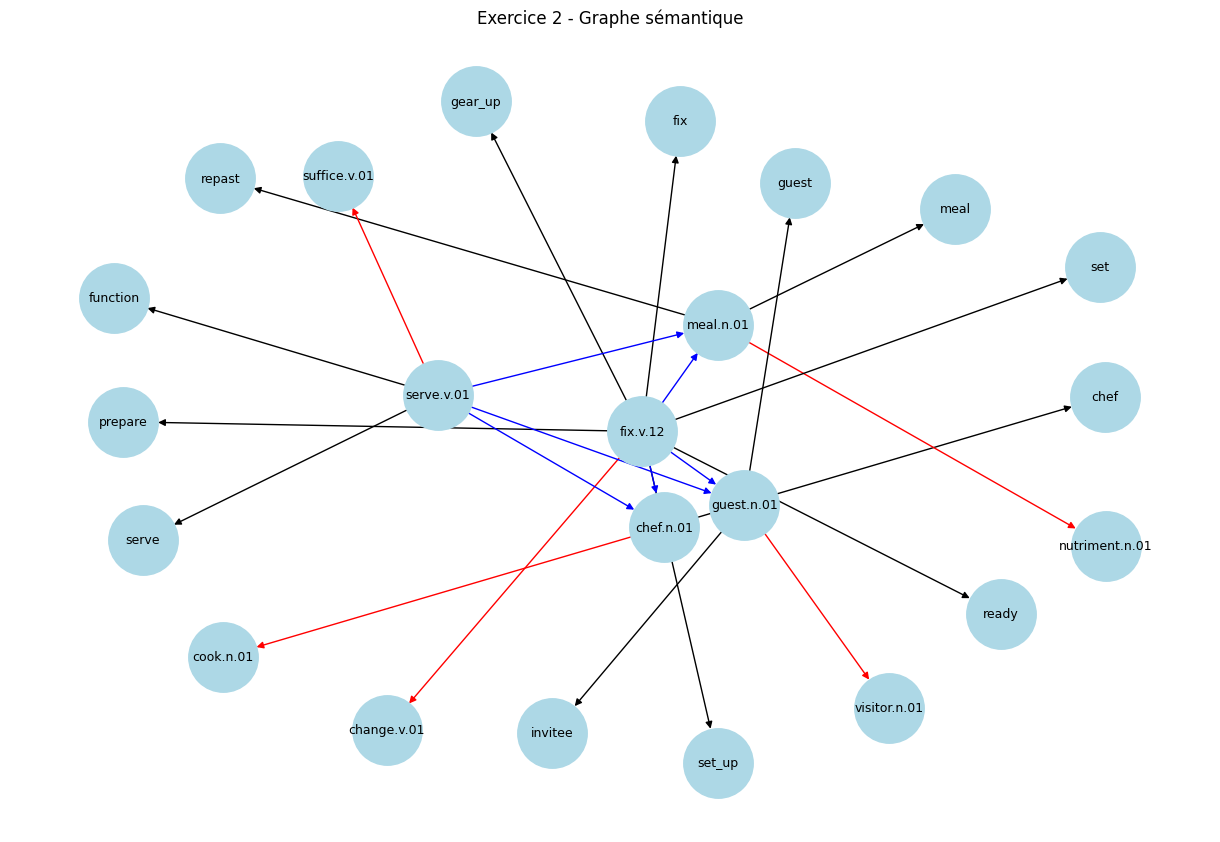

In [17]:
### Dessin
draw_graph(G2, "Exercice 2 - Graphe sémantique")

## Exercice 3 :
### Alice bought a laptop from the store. She used the laptop to write a report.
1. Extraire tous les noms et verbes.
2. Déterminer leurs sens corrects.
3. Construire un graphe sémantique incluant :\
a. Les synsets comme nœuds\
b. Relations : hyperonyme, hyponyme, méronyme

In [ ]:
### Extraction noms & verbes

sentence3 = "Alice bought a laptop from the store. She used the laptop to write a report."
nouns3, verbs3 = get_nouns_verbs(sentence3)

print("Nouns:", nouns3)
print("Verbs:", verbs3)

Nouns: ['Alice', 'laptop', 'store', 'laptop', 'report']
Verbs: ['bought', 'used', 'write']


In [19]:
### Graphe sémantique

G3 = nx.DiGraph()

for word in nouns3 + verbs3:
    syn = get_synset(word)
    if syn:
        G3.add_node(syn.name())
        
        for h in syn.hypernyms():
            G3.add_node(h.name())
            G3.add_edge(syn.name(), h.name(), color='red')
        
        for m in syn.part_meronyms():
            G3.add_node(m.name())
            G3.add_edge(syn.name(), m.name(), color='green')


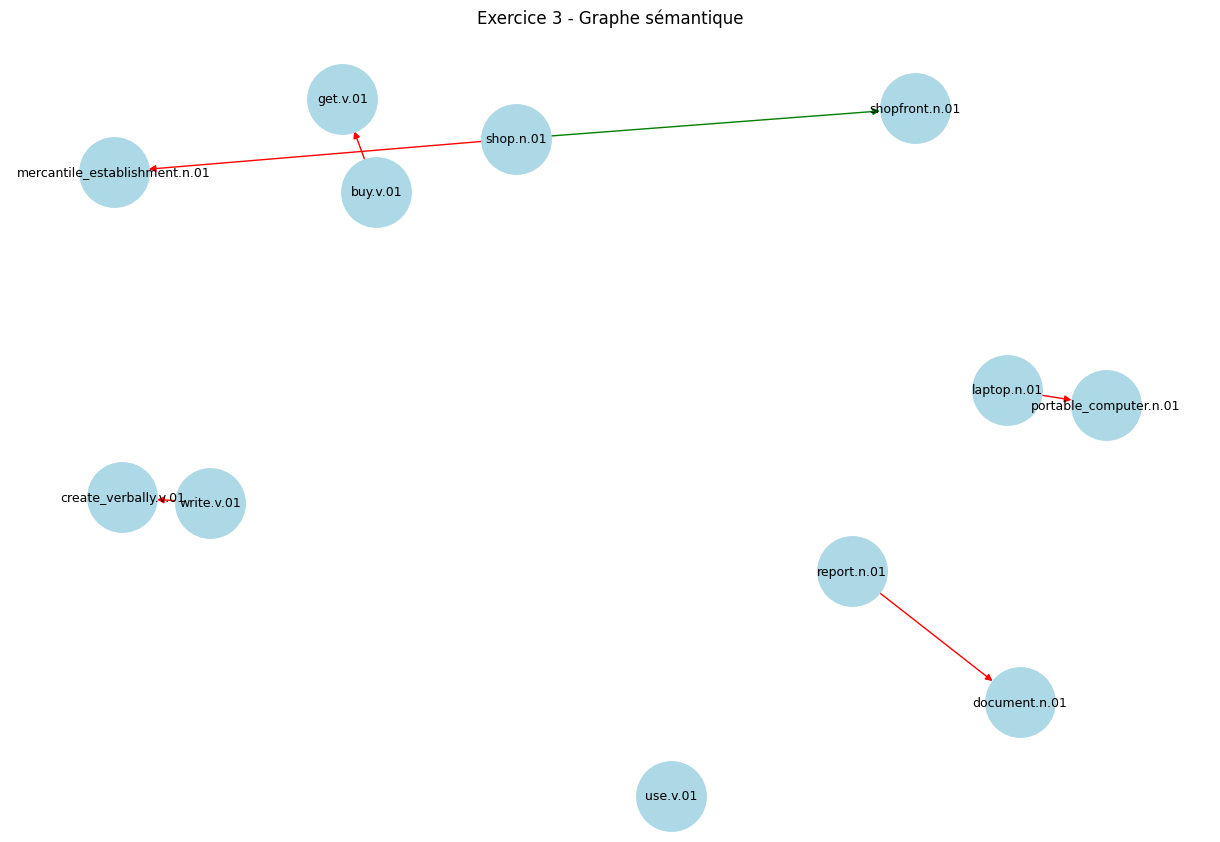

In [20]:
### Dessin
draw_graph(G3, "Exercice 3 - Graphe sémantique")

## Exercice 4 :
### Les voitures, les bus et les vélos sont tous des types de véhicules. Les véhicules sont des machines utilisées pour le transport. Les voitures et les bus ont des moteurs, mais les vélos n’en ont pas. Les voitures électriques utilisent des batteries au lieu de carburant. Les bus peuvent transporter de nombreux passagers, tandis que les voitures en transportent peu. Les vélos sont écologiques et nécessitent un effort humain pour se déplacer. Tous les véhicules circulent sur les routes, sauf les avions, qui sont aussi un type de véhicule mais se déplacent dans le ciel.
1. Trouvez tous les noms dans le paragraphe et affichez leurs synsets.
2. Pour chaque mot principal, trouvez :\
a. hypernymes\
b. hyponymes\
c. meronymes
3. Construisez un graphe avec :\
a. chaque mot = un nœud\
b. les hypernymes = arêtes en rouge\
c. les hyponymes = arêtes en bleu\
d. les meronymes = arêtes en vert

In [ ]:
### Liste des noms principaux

words4 = [
    "car", "bus", "bicycle", "vehicle", "machine",
    "engine", "battery", "fuel", "passenger",
    "road", "airplane", "sky"
]

In [22]:
### Graphe avec couleurs demandées

G4 = nx.DiGraph()

for word in words4:
    syn = get_synset(word)
    if syn:
        G4.add_node(word)
        
        # Hypernymes (rouge)
        for h in syn.hypernyms():
            G4.add_node(h.lemmas()[0].name())
            G4.add_edge(word, h.lemmas()[0].name(), color='red')
        
        # Hyponymes (bleu)
        for hy in syn.hyponyms():
            G4.add_node(hy.lemmas()[0].name())
            G4.add_edge(word, hy.lemmas()[0].name(), color='blue')
        
        # Méronymes (vert)
        for m in syn.part_meronyms():
            G4.add_node(m.lemmas()[0].name())
            G4.add_edge(word, m.lemmas()[0].name(), color='green')


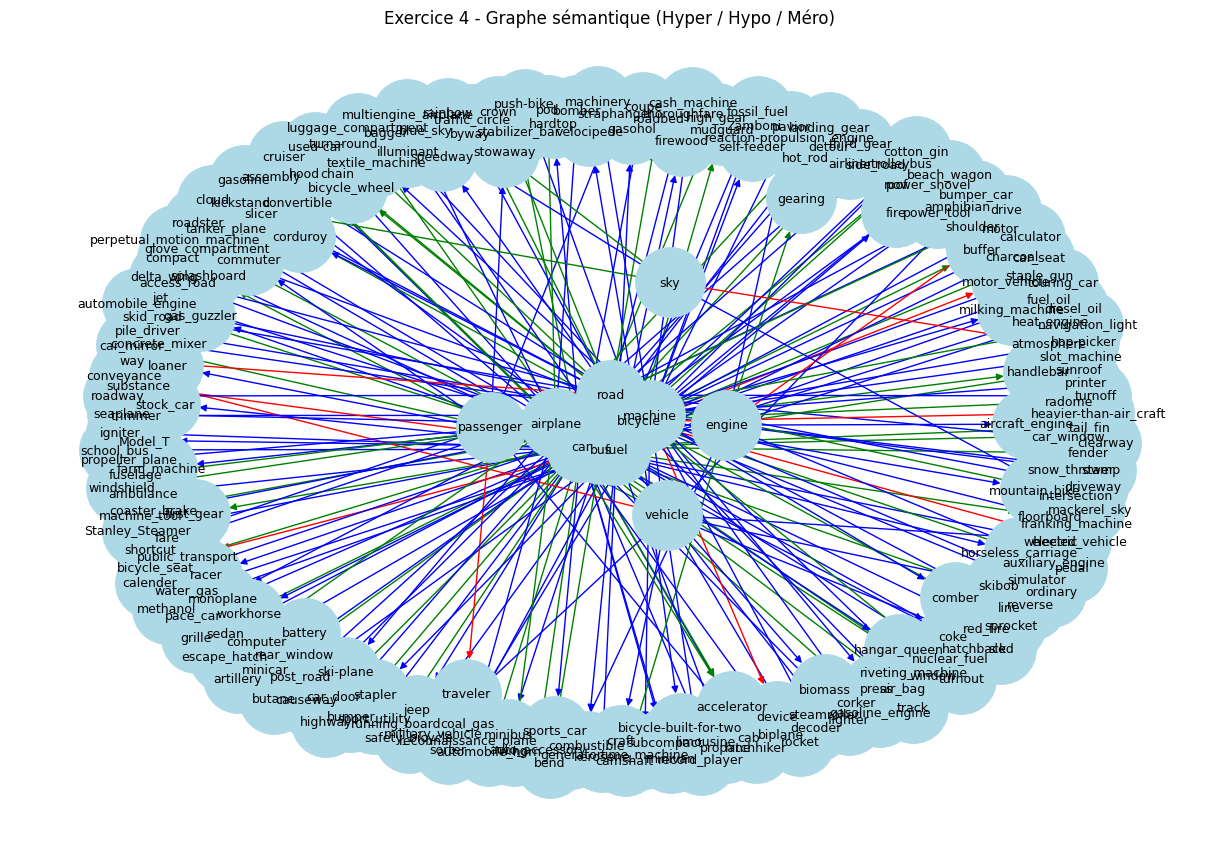

In [23]:
### Dessin final
draw_graph(G4, "Exercice 4 - Graphe sémantique (Hyper / Hypo / Méro)")